# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **Problem Statement**


**Write Problem Statement Here.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
from IPython.display import Audio
import soundfile as sf
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pip install librosa

These import statements are used in Python for audio processing and visualization. They are commonly used in the context of working with audio data and audio files. Here's an explanation of each import:

1. `import librosa`: Librosa is a Python library for analyzing and processing audio and music. It provides a wide range of features for working with audio data, including loading audio files, extracting features from audio signals, and performing various audio analysis tasks. When you import `librosa`, you gain access to its functions and tools for audio analysis.

2. `import librosa.display`: This is a submodule of Librosa that deals specifically with visualizing audio data. It includes functions for plotting audio waveforms, spectrograms, and other visual representations of audio. When you import `librosa.display`, you can use these visualization functions to better understand your audio data.

3. `from IPython.display import Audio`: This import statement allows you to display audio files or audio data directly in IPython or Jupyter Notebook. You can use it to play audio files or snippets of audio within your notebook. The `Audio` class is typically used in combination with the IPython environment to create and play audio objects.

4. `import soundfile as sf`: Soundfile is a Python library for reading and writing sound files. It provides an interface for working with audio files in various formats (e.g., WAV, FLAC). When you import `soundfile` as `sf`, you can use the `sf` namespace to read and write audio files with ease.

These libraries and modules are commonly used in audio-related tasks such as audio analysis, feature extraction, and audio file manipulation. They are especially useful when working with audio data in scientific, research, and creative projects.

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
x, sr = librosa.load('/content/drive/MyDrive/Coders cave internship/03-01-01-01-01-01-01.wav')
sf.write('stereo_file.wav', np.random.randn(10, 2), 44100, 'PCM_24')
Audio(data=x, rate=sr)

### Dataset First View

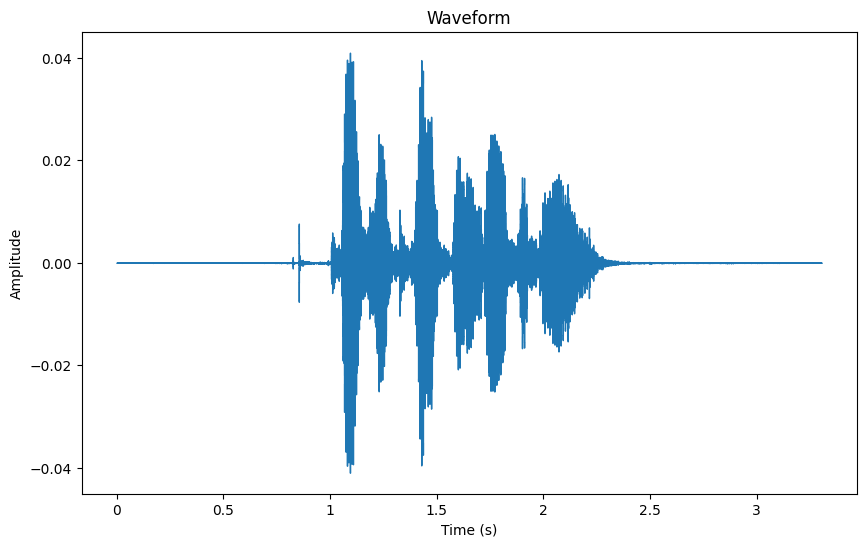

In [ ]:
import librosa
import matplotlib.pyplot as plt


# Plot the waveform
plt.figure(figsize=(10, 6))
librosa.display.waveshow(x, sr=sr)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.show()


A spectrogram is a visual way of representing the signal strength, or “loudness”, of a signal over time at various frequencies present in a particular waveform.

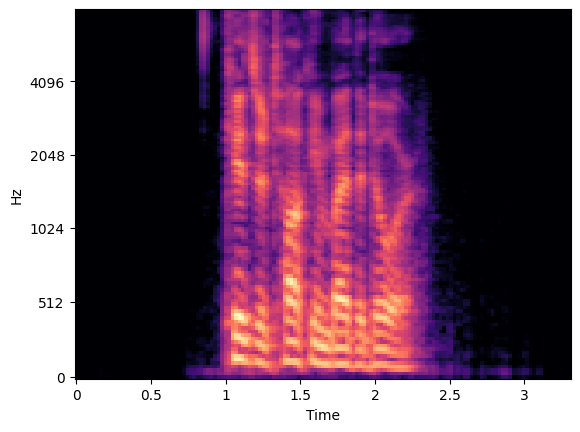

In [ ]:
spectrogram=librosa.feature.melspectrogram(y=x,sr=sr,n_mels=128,fmax=8000)
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');

## ***. Feature Preprocessing***

The speech signal usually
include many parts of silence. The silence
signal is not important because it does not contain useful
information.

**Zero crossing rate** is a measure of number of times
in a given time interval such that the amplitude
of the speech signals passes through a value of
zero.

In [ ]:
# Data Preprocessing
# Silence Removal
# Taking window of 4 and if number of zero croasigs are greater than 2,we dont include amplitudes in this wondow
def zero_crossing(x):
    zero_crossings=[]
    silence_removed=[]
    silence_removed=np.array(silence_removed)
    for i  in range(1,len(x)):
        # detecting zero crossing
        if(x[i-1]<=0 and x[i]>0):
            zero_crossings.append(1)
        else:
            zero_crossings.append(0)
    for i in range(len(zero_crossings)-3):
        zeros=np.sum(zero_crossings[4*i:4*(i+1)])
        #print(zeros)
        zeros=4-zeros
        if(zeros>2):
            silence_removed=np.concatenate((silence_removed,np.array(x[4*i:4*(i+1)])))
    print("Before Silence Removal : ",len(x),"\nAfter Silence Removal : ",len(silence_removed))
    return silence_removed

In [ ]:
silence_removed=zero_crossing(x)

Before Silence Removal :  72838 
After Silence Removal :  49490


In [ ]:
Audio(data=x, rate=sr)

In [ ]:
Audio(data=silence_removed, rate=sr)

Both silence removed and normal audio wave sounds similar.

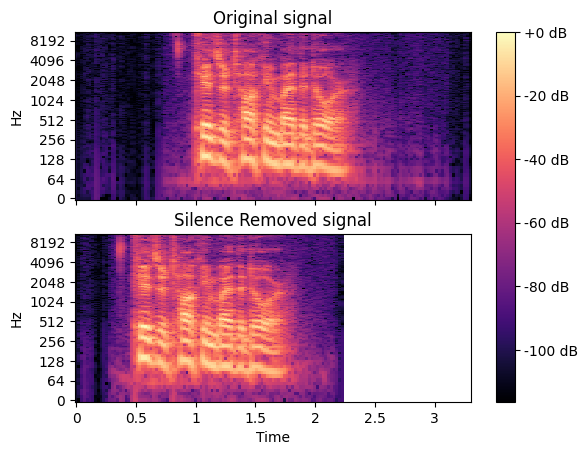

In [ ]:
S_orig = librosa.amplitude_to_db(np.abs(librosa.stft(x)), ref=np.max, top_db=None)
S_preemph = librosa.amplitude_to_db(np.abs(librosa.stft(silence_removed)), ref=np.max, top_db=None)
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.specshow(S_orig, y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Original signal')
ax[0].label_outer()
img = librosa.display.specshow(S_preemph, y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='Silence Removed signal')
fig.colorbar(img, ax=ax, format="%+2.f dB")

The **pre-emphasis** of the speech
signal is the most important steps of
preprocessing at high frequency. It finds
comparable amplitude by passing the speech signal through a high-pass filter (FIR).

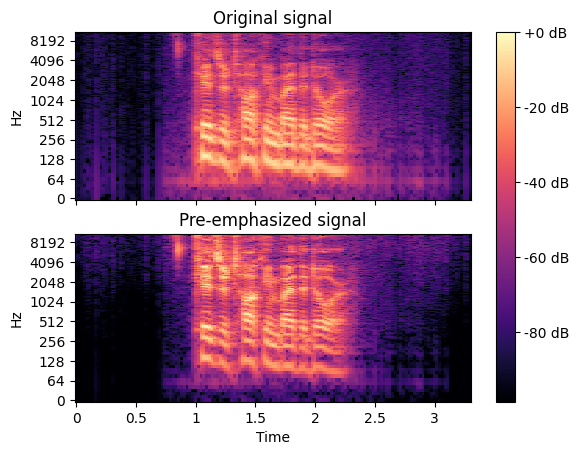

In [ ]:
#Pre-emphasis
y_filt = librosa.effects.preemphasis(x)
# and plot the results for comparison
S_orig = librosa.amplitude_to_db(np.abs(librosa.stft(x)), ref=np.max, top_db=None)
S_preemph = librosa.amplitude_to_db(np.abs(librosa.stft(y_filt)), ref=np.max, top_db=None)
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.specshow(S_orig, y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Original signal')
ax[0].label_outer()
img = librosa.display.specshow(S_preemph, y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='Pre-emphasized signal')
fig.colorbar(img, ax=ax, format="%+2.f dB")

**Normalization** is a strategy for modifying
the volume of sound to a standard level.

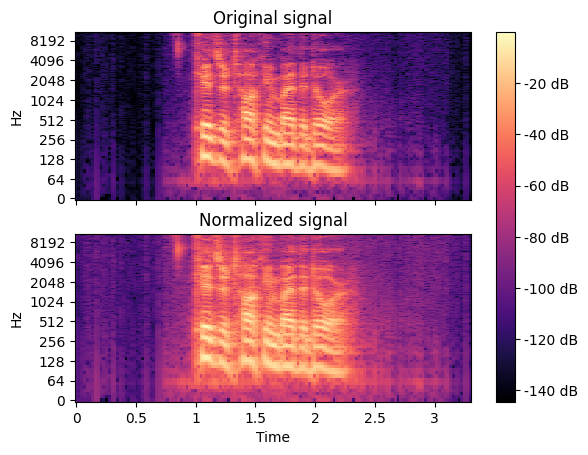

In [ ]:
#Normalization
x_norm=x/max(x)
S_orig = librosa.amplitude_to_db(np.abs(librosa.stft(x)), ref=np.max, top_db=None)
S_preemph = librosa.amplitude_to_db(np.abs(librosa.stft(x_norm)), ref=np.max, top_db=None)
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.specshow(S_orig, y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Original signal')
ax[0].label_outer()
img = librosa.display.specshow(S_preemph, y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='Normalized signal')
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [ ]:
def preprocessing(file):
    X,sample_rate = librosa.load(file)
    # zero crossing
    #silence_removed=zero_crossing(X)
    # Pre emphasis
    y_filt = librosa.effects.preemphasis(X)
    # normalization
    #x_norm=y_filt/max(y_filt)
    return y_filt,sample_rate

## ***Feature extraction***

In [ ]:
# All the types of emotions that are present
emotions_all={
    '01' : 'neutral',
    '02' : 'calm' ,
    '03' : 'happy' ,
    '04' : 'sad' ,
    '05' : 'angry',
    '06' : 'fearful' ,
    '07' : 'disgust',
    '08' : 'surprised'
}

In [ ]:
# Feature extraction using librosa a python package for audio analysis
# Chroma features

def feature_extraction(X,sample_rate):
    result = np.array([])

    # chroma stft: Compute a chromagram from a waveform or power spectrum
    stft = np.abs(librosa.stft(X))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft))

    # mfcc: Mel-frequency cepstral coefficients
    mfcc = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc))

    # melspectogram: Compute a mel-scaled spectrogram
    mel = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)
    result=np.hstack((result, mel))

    return result

In [ ]:
from glob import glob
files_audio1 = glob('/content/drive/MyDrive/Coders cave internship/03-01-01-01-01-02-18.wav'+'/*/*.wav')
files_audio2 = glob('/content/drive/MyDrive/Coders cave internship/03-01-01-01-02-01-13.wav'+'/*/*.wav')


In [ ]:
from glob import glob
files_audio = glob('/content/drive/MyDrive/Coders cave internship/audio files'+'/*/*.wav',recursive=True)

In [ ]:
files_audio

[]

In [ ]:
import matplotlib.pyplot as plt

for i in range(3):
    audio,sfreq = librosa.load(files_audio[i][0])
    time = np.arange(0,len(audio))/sfreq
    fig,ax = plt.subplots()
    ax.plot(time,audio)
    ax.set_xlabel('Time')
    ax.set_ylabel('Amplitude')

In [ ]:
# Read File name identifiers and load data values

x,y=[],[]
# Considered the following emotions
emotions=['happy','sad','angry','fearful','disgust']

from IPython.display import clear_output
e = set()

for file in files_audio:
        clear_output(wait=True)
        file_name = file.split('/')[-1]
        emotion=emotions_all[file_name.split("-")[2]]
        if emotion not in emotions:
            continue
        e.add(file.split('/')[-2])
        # preprocessing audio data
        pre_speech=preprocessing(file)
        # feature extraction from audio
        feature=feature_extraction(pre_speech[0],pre_speech[1])
        print(e)
        x.append(feature)
        y.append(emotion)